### Filter dataset to get list of positive and negative sites

In [8]:
# Autoreload 
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np

from pathlib import Path
from typing import Union, List, Tuple, Dict, Optional

# STFU
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load data

In [27]:
from phosphosite.dataset.uniprot import sequence_dict

### Load POSITIVE EXAMPLES

In [29]:
# These are filtered for STY sites only, 
# phosphorylation only, 
# and Human organism only. 
# We also have removed all isoforms. 
from phosphosite.dataset import psp_filtered
psp_filtered 


,uniprot_id,mod_rsd,mod,site,res,pos
0,P31946,T2-p,p,T2,T,2
1,P31946,S6-p,p,S6,S,6
2,P31946,Y21-p,p,Y21,Y,21
3,P31946,T32-p,p,T32,T,32
4,P31946,S39-p,p,S39,S,39
...,...,...,...,...,...,...
239815,Q8IYH5,S474-p,p,S474,S,474
239816,Q8IYH5,S606-p,p,S606,S,606
239817,Q8IYH5,Y670-p,p,Y670,Y,670
239818,Q8IYH5,S677-p,p,S677,S,677


### Structural annotation dataframe

From `structuremap`

In [1]:
from phosphosite.bubble.data import result_df
result_df[0:2]

,protein_id,prev,res,pos,next,ref_atom,ref_atom_dist,nn_res,nn_pos,nn_atom,site_qual,site_structure,nn_qual,nn_structure,seq_dist,triplet,phosphosite
0,A0A075B759,N,S,4,V,CA,4.805941,Q,163,NE2,93.22,unstructured,96.92,STRN,159,NSV,False
1,A0A075B759,N,S,4,V,OG,3.702720,Q,163,NE2,93.22,unstructured,96.92,STRN,159,NSV,False


In [26]:
result_df.phosphosite.value_counts()

False    2276206
True      297880
Name: phosphosite, dtype: int64

In [32]:
# Filter for only rows with CA atom 
structural_df = result_df[result_df.ref_atom == 'CA']
structural_df.phosphosite.value_counts()

False    1149675
True      151217
Name: phosphosite, dtype: int64

##### Structural annotation from `bubble` processing
Note: why are there only ~150,000 sites with structural annotations? 

When we had around 200,000 sites from PSP? 



Note: we may be able to use ALL the phosphosites for our training data, while only having a small subset (~150,000) with which to use for our 'distribution sampling'. 

In [37]:
# for the PHOSPHOSITES (positive examples)
# Get counts of each pLDDT range per secondary structure annotation. 
pos_examples = structural_df[structural_df.phosphosite == True]

# for each unique "site_structure" value, get the value counts

for site_structure in pos_examples.site_structure.unique():
    print(site_structure)
    distr = pos_examples[pos_examples.site_structure == site_structure].site_qual.value_counts(bins=20, sort=False)
    print(distr)

HELX_RH_AL_P
(24.244, 28.052]      12
(28.052, 31.783]      54
(31.783, 35.514]     168
(35.514, 39.246]     306
(39.246, 42.978]     456
(42.978, 46.709]     573
(46.709, 50.44]      689
(50.44, 54.172]      838
(54.172, 57.903]    1054
(57.903, 61.635]    1027
(61.635, 65.366]    1034
(65.366, 69.098]    1105
(69.098, 72.83]     1387
(72.83, 76.561]     1529
(76.561, 80.292]    2056
(80.292, 84.024]    2782
(84.024, 87.755]    4389
(87.755, 91.487]    5903
(91.487, 95.218]    7499
(95.218, 98.95]     9608
Name: site_qual, dtype: int64
unstructured
(17.767999999999997, 21.906]     143
(21.906, 25.961]                2046
(25.961, 30.016]                5806
(30.016, 34.072]                7270
(34.072, 38.128]                6320
(38.128, 42.183]                4920
(42.183, 46.238]                3734
(46.238, 50.294]                2874
(50.294, 54.35]                 2326
(54.35, 58.405]                 1902
(58.405, 62.46]                 1347
(62.46, 66.516]                 1119


In [39]:
neg_candidates = structural_df[structural_df.phosphosite == False]

# TODO: join with dbPTM and filter. 



In [ ]:
# Build a dataframe of all the negative examples, randomly sampling from the neg_candidates
# and assigned to bins

In [93]:
# Testing with one SS 

ss = "HELX_RH_AL_P"

pos_df = pos_examples[pos_examples.site_structure == ss]
neg_candidates = neg_candidates[neg_candidates.site_structure == ss]
neg_df = neg_candidates

distr = pos_df.site_qual.value_counts(bins=20, sort=False)
intervals = distr.index.to_list()


In [88]:
distr

(24.244, 28.052]      12
(28.052, 31.783]      54
(31.783, 35.514]     168
(35.514, 39.246]     306
(39.246, 42.978]     456
(42.978, 46.709]     573
(46.709, 50.44]      689
(50.44, 54.172]      838
(54.172, 57.903]    1054
(57.903, 61.635]    1027
(61.635, 65.366]    1034
(65.366, 69.098]    1105
(69.098, 72.83]     1387
(72.83, 76.561]     1529
(76.561, 80.292]    2056
(80.292, 84.024]    2782
(84.024, 87.755]    4389
(87.755, 91.487]    5903
(91.487, 95.218]    7499
(95.218, 98.95]     9608
Name: site_qual, dtype: int64

In [89]:
bins = pd.IntervalIndex(intervals)
bins

IntervalIndex([(24.244, 28.052], (28.052, 31.783], (31.783, 35.514], (35.514, 39.246], (39.246, 42.978] ... (80.292, 84.024], (84.024, 87.755], (87.755, 91.487], (91.487, 95.218], (95.218, 98.95]], dtype='interval[float64, right]')

In [91]:
distr[intervals[-1]]

9608

In [92]:
b = bins[0]
# index into distr
distr[bins[-1]]

9608

In [94]:
# Assign each negative example to a bin (intervals)
neg_df["binned"] = pd.cut(neg_df["site_qual"], bins)
neg_df

,protein_id,prev,res,pos,next,ref_atom,ref_atom_dist,nn_res,nn_pos,nn_atom,site_qual,site_structure,nn_qual,nn_structure,seq_dist,triplet,phosphosite,binned
0,A0A075B759,K,T,32,A,CA,3.949881,I,29,O,98.24,HELX_RH_AL_P,96.56,unstructured,-3,KTA,False,"(95.218, 98.95]"
0,A0A075B759,S,T,41,G,CA,3.960348,A,38,O,97.95,HELX_RH_AL_P,98.06,HELX_RH_AL_P,-3,STG,False,"(95.218, 98.95]"
0,A0A087WUL8,H,S,101,Q,CA,3.631385,L,98,O,95.07,HELX_RH_AL_P,95.47,HELX_RH_AL_P,-3,HSQ,False,"(91.487, 95.218]"
0,A0A087WUL8,A,S,120,R,CA,3.718260,G,116,O,92.87,HELX_RH_AL_P,94.65,HELX_RH_AL_P,-4,ASR,False,"(91.487, 95.218]"
0,A0A087WUL8,R,S,122,L,CA,3.736681,D,118,O,94.17,HELX_RH_AL_P,92.19,HELX_RH_AL_P,-4,RSL,False,"(91.487, 95.218]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Q9HAU8,K,Y,473,K,CA,3.481472,T,476,OG1,97.70,HELX_RH_AL_P,96.26,STRN,3,KYK,False,"(95.218, 98.95]"
0,Q9HAU8,C,Y,590,S,CA,3.581844,L,586,O,96.08,HELX_RH_AL_P,96.05,HELX_RH_AL_P,-4,CYS,False,"(95.218, 98.95]"
0,Q9HAU8,M,Y,633,T,CA,3.941539,S,630,O,90.56,HELX_RH_AL_P,89.19,unstructured,-3,MYT,False,"(87.755, 91.487]"
0,Q9HAU8,L,Y,638,E,CA,3.649874,I,635,O,95.74,HELX_RH_AL_P,92.39,HELX_RH_AL_P,-3,LYE,False,"(95.218, 98.95]"


In [109]:
out_df = pd.DataFrame()
for bin in bins: 
    # count in original positives 
    count = distr[bin]
    df = neg_df[neg_df.binned == bin].sample(n=count)
    out_df = out_df.append(df)

out_df

,protein_id,prev,res,pos,next,ref_atom,ref_atom_dist,nn_res,nn_pos,nn_atom,site_qual,site_structure,nn_qual,nn_structure,seq_dist,triplet,phosphosite,binned
0,Q96RL7,F,S,432,W,CA,4.910558,G,429,O,26.31,HELX_RH_AL_P,32.54,unstructured,-3,FSW,False,"(24.244, 28.052]"
0,Q8WVT3,A,S,221,D,CA,3.806177,S,218,O,27.71,HELX_RH_AL_P,29.27,unstructured,-3,ASD,False,"(24.244, 28.052]"
0,Q8N859,L,T,157,H,CA,3.771215,V,154,O,26.65,HELX_RH_AL_P,24.23,HELX_RH_AL_P,-3,LTH,False,"(24.244, 28.052]"
0,P10643,H,T,216,S,CA,3.723156,T,213,O,27.68,HELX_RH_AL_P,54.70,HELX_RH_AL_P,-3,HTS,False,"(24.244, 28.052]"
0,Q5JNZ3,A,Y,164,W,CA,4.895068,G,161,O,25.99,HELX_RH_AL_P,29.28,TURN_TY1_P,-3,AYW,False,"(24.244, 28.052]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,P78537,L,T,63,E,CA,3.601430,T,60,O,98.47,HELX_RH_AL_P,98.56,HELX_RH_AL_P,-3,LTE,False,"(95.218, 98.95]"
0,P15336,Q,S,396,E,CA,3.577067,Q,393,O,98.59,HELX_RH_AL_P,98.69,HELX_RH_AL_P,-3,QSE,False,"(95.218, 98.95]"
0,O95251,V,S,557,T,CA,3.705636,V,553,O,95.27,HELX_RH_AL_P,95.39,HELX_RH_AL_P,-4,VST,False,"(95.218, 98.95]"
0,Q86Y56,S,T,443,L,CA,3.522195,I,440,O,97.06,HELX_RH_AL_P,98.63,HELX_RH_AL_P,-3,STL,False,"(95.218, 98.95]"


In [96]:
sum(distr.values)

42469

In [97]:
len(pos_df), len(out_df)

(42469, 42469)

### Visually check that sampling is approximately correct

<Axes: xlabel='site_qual', ylabel='Count'>

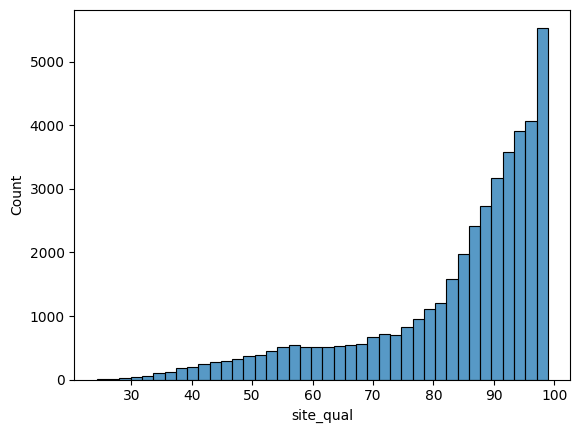

In [102]:
# Plot histogram of the distribution of pLDDT scores for the positive and negative examples.
import seaborn as sns 

n_bins = 40
sns.histplot(pos_df.site_qual, bins=n_bins, kde=False, label="positive")

<Axes: xlabel='site_qual', ylabel='Count'>

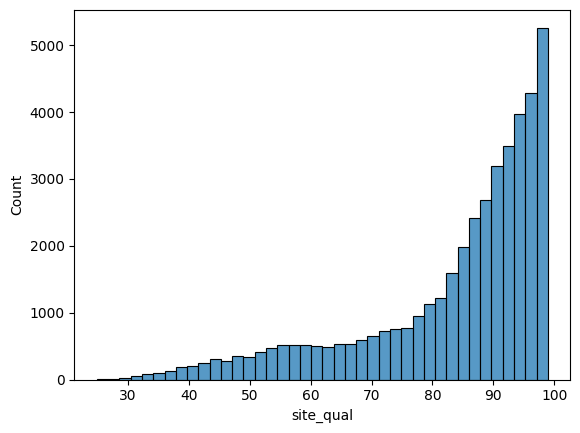

In [103]:
sns.histplot(out_df.site_qual, bins=n_bins, kde=False, label="negative")

In [54]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])

In [58]:
pd.cut([0, 0.5, 1.5, 2.5, 4.5], bins)

[NaN, (0.0, 1.0], NaN, (2.0, 3.0], (4.0, 5.0]]
Categories (3, interval[int64, right]): [(0, 1] < (2, 3] < (4, 5]]

### Function that performs the sampling 

Given a ratio (1:1 by default) of COUNTS, or a NUMBER (i.e. total number of rows to randomly sample) 
 
- given n bins 
-  

sample for all unique column values such that distribution of 2nd column for each is same.  


Can provide the dataframe from which to base the *distribution* on (i.e. structural df of 150,000 rows) but scale
the ratios of all the counts (for each bin) by a factor such that the sum is equal to "count" (i.e. 200,000 actual rows used in dataset) 
so that we can combine with the pos example dataframe which didn't necessarily have structural annotation data. 



In [104]:
structural_df[0:2]

,protein_id,prev,res,pos,next,ref_atom,ref_atom_dist,nn_res,nn_pos,nn_atom,site_qual,site_structure,nn_qual,nn_structure,seq_dist,triplet,phosphosite
0,A0A075B759,N,S,4,V,CA,4.805941,Q,163,NE2,93.22,unstructured,96.92,STRN,159,NSV,False
0,A0A075B759,I,S,21,I,CA,3.452576,V,6,O,98.17,STRN,98.44,STRN,-15,ISI,False


In [121]:
from phosphosite.utils.sampling import sample_from_plddt_distribution 

pos = structural_df[structural_df.phosphosite == True]
neg = structural_df[structural_df.phosphosite == False]
out_df = sample_from_plddt_distribution(
    data=pos,          # positive examples 
    sample_from=neg,  # negative examples
    secondary_structure_col="site_structure",                       # column to use for discrete secondary structure annotation
    plddt_col="site_qual",                                          # column to use for pLDDT scores
    n_bins=20,                                                      # number of bins to use for pLDDT scores
    n_samples=None,                                     # use same number as input distribution
)

In [170]:
len(out_df), len(pos)

(151216, 151217)

<Axes: xlabel='site_qual', ylabel='Count'>

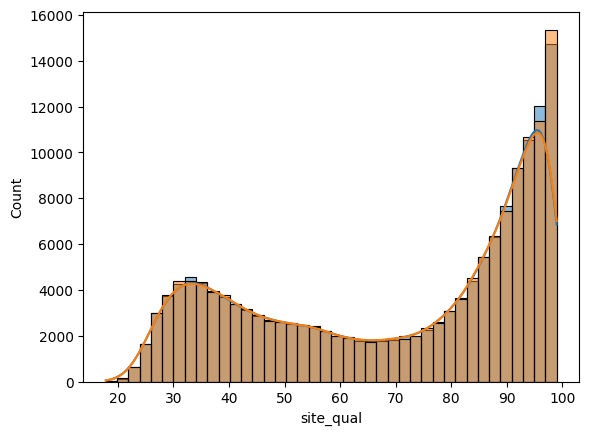

In [128]:
n_bins = 40
sns.histplot(out_df.site_qual, bins=n_bins, kde=True, label="negative")
sns.histplot(pos.site_qual, bins=n_bins, kde=True, label="positive",
             legend=True)
             

<Axes: xlabel='site_qual', ylabel='Count'>

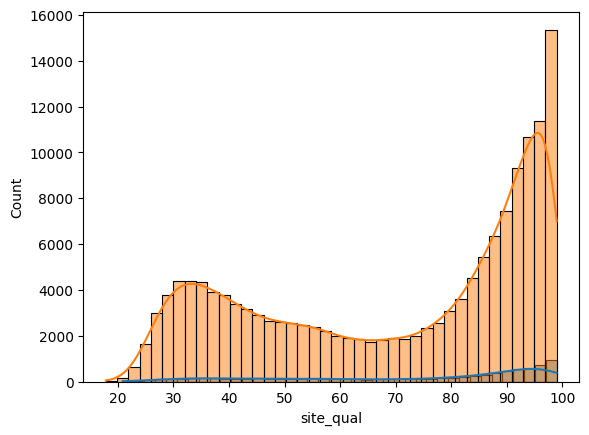

In [130]:
n_bins = 40
sns.histplot(subset_out_df.site_qual, bins=n_bins, kde=True, label="negative")
sns.histplot(pos.site_qual, bins=n_bins, kde=True, label="positive",)
             

<Axes: xlabel='site_qual', ylabel='Density'>

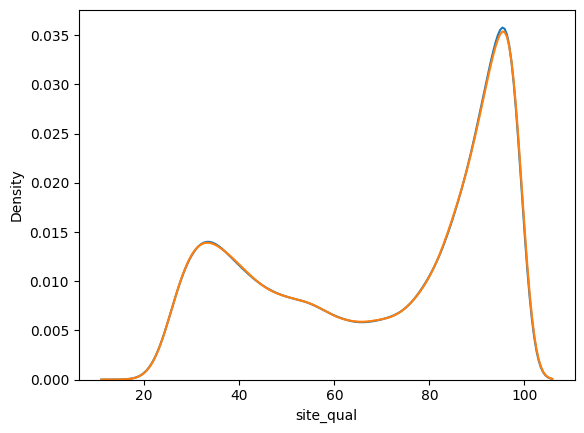

In [138]:
sns.kdeplot(out_df.site_qual, label="negative")
sns.kdeplot(pos.site_qual, label="positive")

### Attempt with smaller count

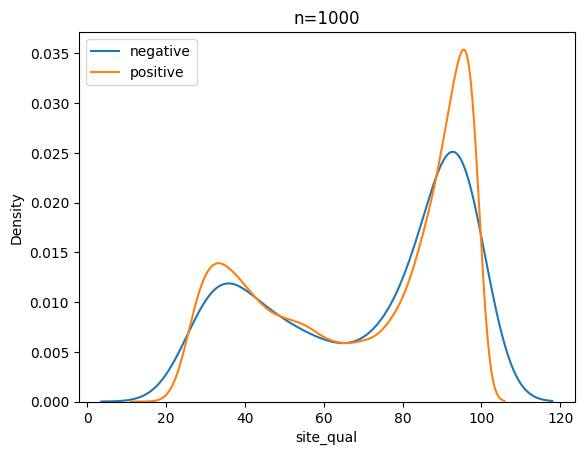

In [157]:
import matplotlib.pyplot as plt
n = 1000
subset_out_df = sample_from_plddt_distribution(
    data=pos,          # positive examples 
    sample_from=neg,  # negative examples
    secondary_structure_col="site_structure",                       # column to use for discrete secondary structure annotation
    plddt_col="site_qual",                                          # column to use for pLDDT scores
    n_bins=20,                                                      # number of bins to use for pLDDT scores
    n_samples=n,                                     # use only 1,000 samples
)

# plot distribution to subplot 
sns.kdeplot(subset_out_df.site_qual, label="negative")
sns.kdeplot(pos.site_qual, label="positive")
plt.title(f"n={n}")
plt.legend()


In [158]:
subset_out_df

,protein_id,prev,res,pos,next,ref_atom,ref_atom_dist,nn_res,nn_pos,nn_atom,site_qual,site_structure,nn_qual,nn_structure,seq_dist,triplet,phosphosite,binned
0,Q9UKA4,E,S,890,M,CA,3.787040,E,886,O,32.95,HELX_RH_AL_P,62.45,HELX_RH_AL_P,-4,ESM,False,"(31.783, 35.514]"
0,Q3SXZ3,N,S,158,N,CA,3.548849,K,154,O,36.91,HELX_RH_AL_P,32.53,HELX_RH_AL_P,-4,NSN,False,"(35.514, 39.246]"
0,Q8TD22,D,T,4,A,CA,3.483736,T,7,OG1,39.11,HELX_RH_AL_P,40.61,HELX_RH_AL_P,3,DTA,False,"(35.514, 39.246]"
0,O75140,R,S,1002,D,CA,4.411627,M,1005,N,41.33,HELX_RH_AL_P,33.99,HELX_RH_AL_P,3,RSD,False,"(39.246, 42.978]"
0,P53816,M,S,52,A,CA,3.428716,T,55,OG1,40.03,HELX_RH_AL_P,56.55,BEND,3,MSA,False,"(39.246, 42.978]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Q9UNA4,V,Y,183,N,CA,3.753819,V,245,O,98.65,HELX_RH_3T_P,98.87,STRN,62,VYN,False,"(95.16, 98.93]"
0,P20701,R,Y,427,Q,CA,3.718121,A,424,O,97.71,HELX_RH_3T_P,98.56,STRN,-3,RYQ,False,"(95.16, 98.93]"
0,Q6P179,S,T,261,Y,CA,4.176791,F,220,CZ,98.88,HELX_RH_3T_P,98.93,STRN,-41,STY,False,"(95.16, 98.93]"
0,P26196,D,Y,101,C,CA,3.918197,F,98,O,95.31,HELX_RH_3T_P,96.15,HELX_RH_3T_P,-3,DYC,False,"(95.16, 98.93]"


In [ ]:
# Create 3
n_bins = 20
n_vals = [1_000, 10_000, 100_000]
df_dict = {}
for n in n_vals:
    df_dict[n] = sample_from_plddt_distribution(
        data=pos,          # positive examples 
        sample_from=neg,  # negative examples
        secondary_structure_col="site_structure",                       # column to use for discrete secondary structure annotation
        plddt_col="site_qual",                                          # column to use for pLDDT scores
        n_bins=n_bins,                                                      # number of bins to use for pLDDT scores
        n_samples=n,                                     # use only 1,000 samples
    )

/tmp/ipykernel_124215/4248939882.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df1.site_qual, label="negative", ax=axes[i,j])


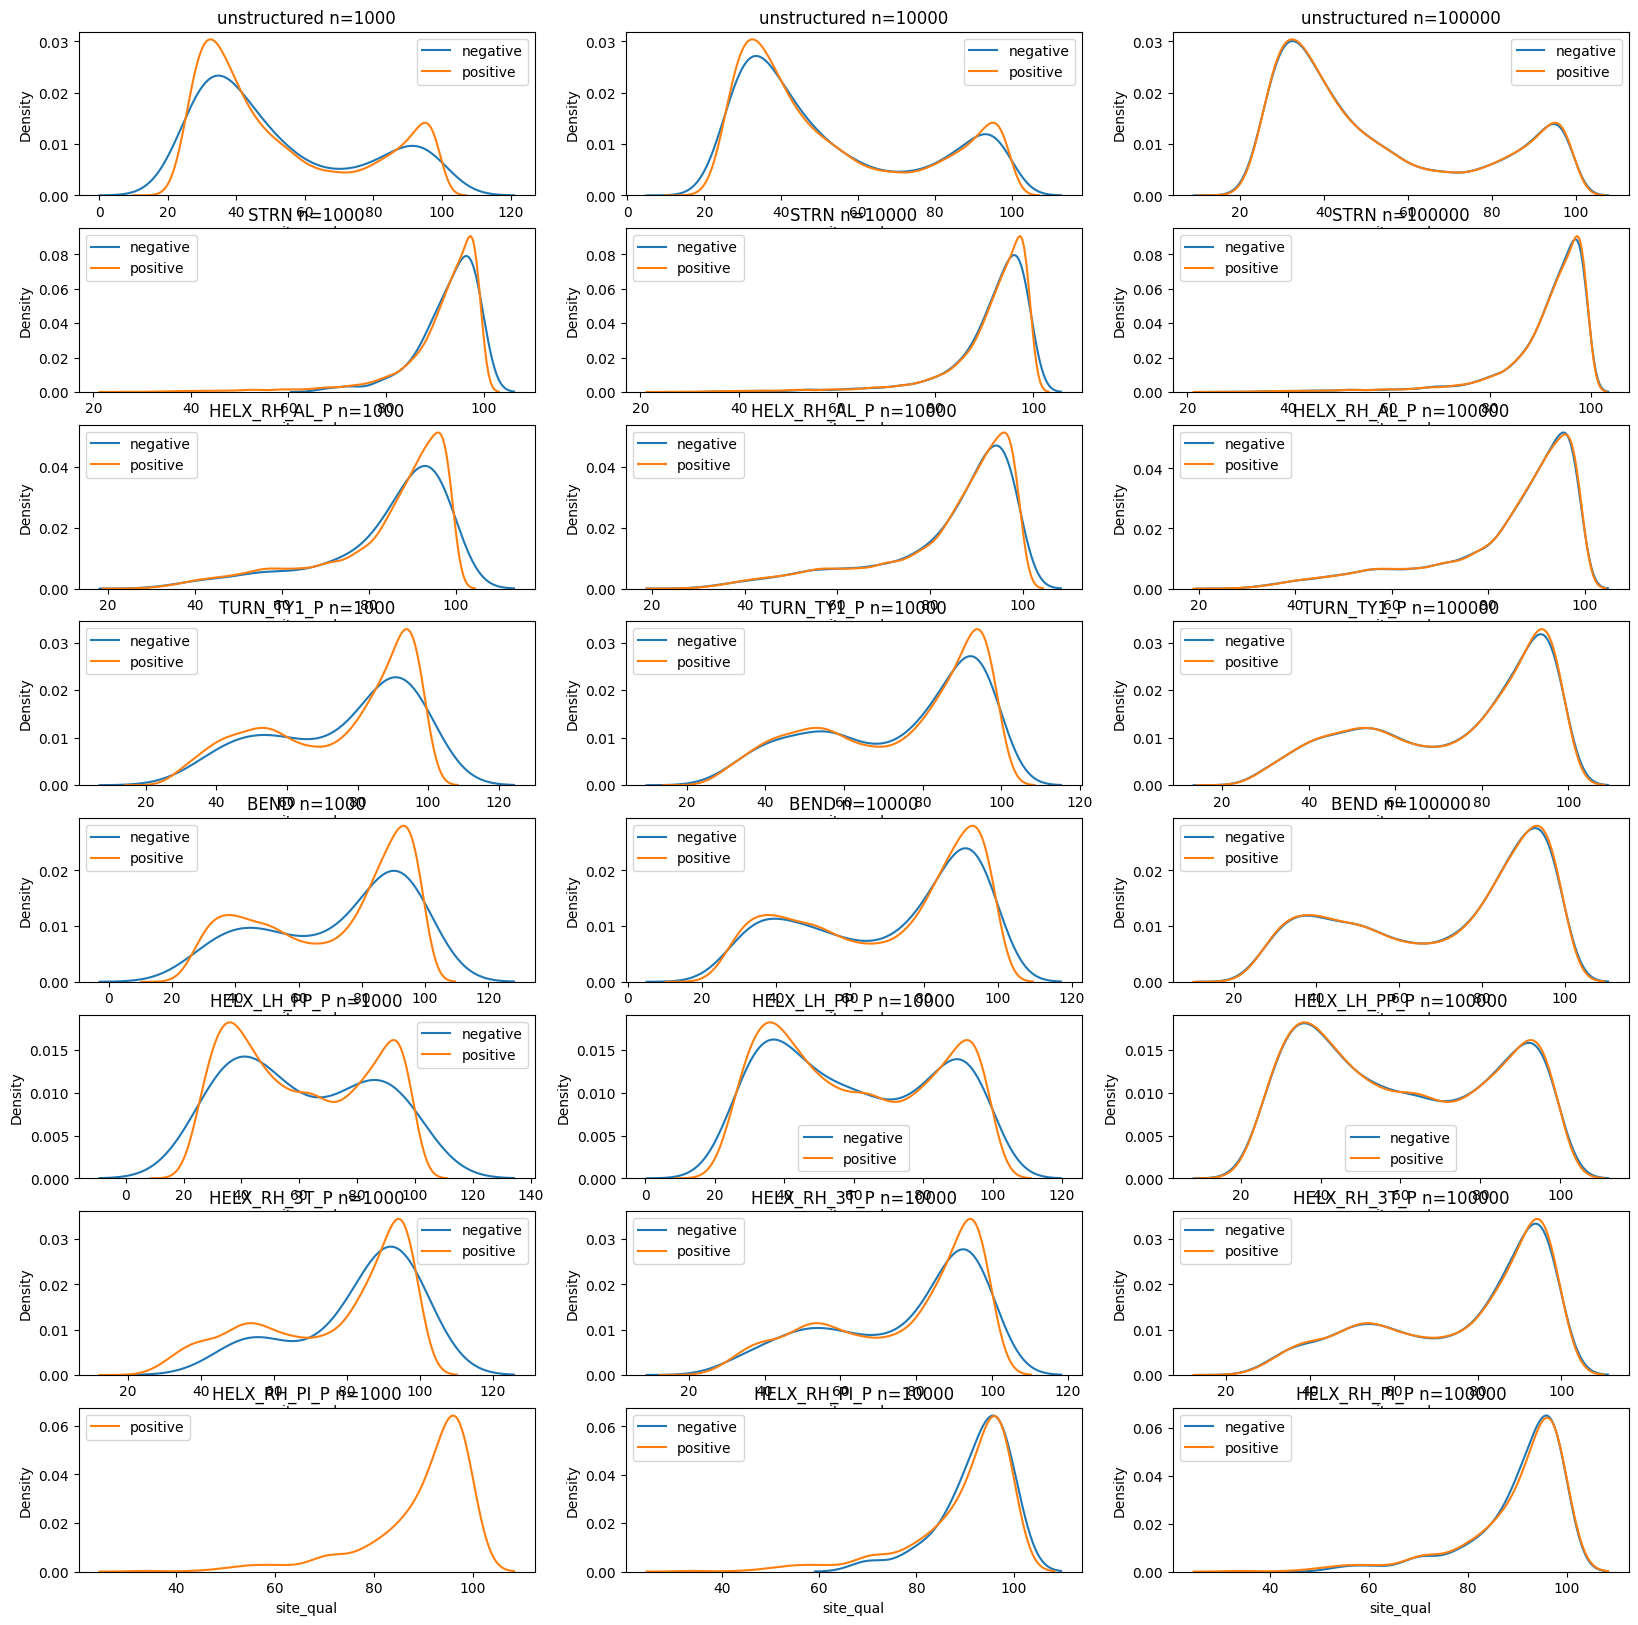

In [169]:
all_unique_ss = list(structural_df.site_structure.unique())
n_rows = len(n_vals)
n_cols = len(all_unique_ss)
fig, axes = plt.subplots(n_cols, n_rows, figsize=(20, 20))
for i, ss in enumerate(all_unique_ss):
    for j, n in enumerate(n_vals):

        df1 = df_dict[n]
        df1 = df1[df1.site_structure == ss]

        df2 = pos[pos.site_structure == ss]
        # plot distribution to subplot 
        sns.kdeplot(df1.site_qual, label="negative", ax=axes[i,j])
        sns.kdeplot(df2.site_qual, label="positive", ax=axes[i,j])
        axes[i,j].set_title(f"{ss} n={n}")
        axes[i,j].legend()
    



### Check distribution of STY

<Axes: xlabel='res', ylabel='count'>

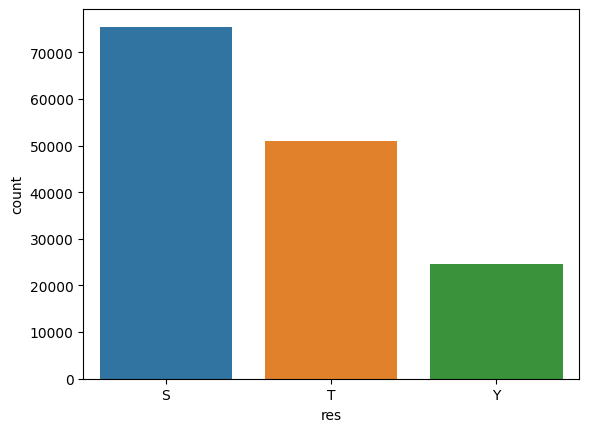

In [181]:
sns.countplot(x="res", data=out_df, order = ("S", "T", "Y"))

In [182]:
pos.site_structure.value_counts()

unstructured    55370
HELX_RH_AL_P    42469
STRN            17278
BEND            12302
TURN_TY1_P      11882
HELX_LH_PP_P     6938
HELX_RH_3T_P     4520
HELX_RH_PI_P      458
Name: site_structure, dtype: int64

<Axes: xlabel='res', ylabel='count'>

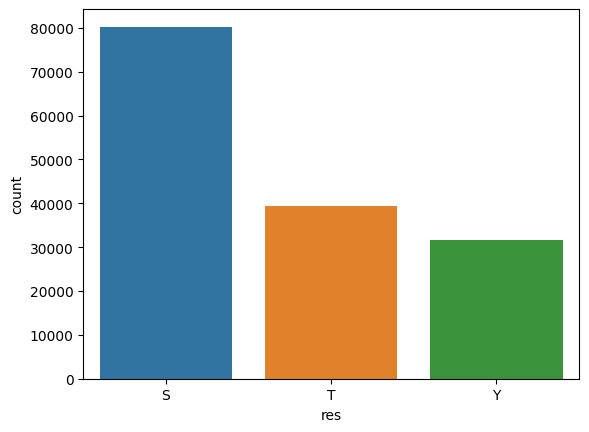

In [180]:
sns.countplot(x="res", data=pos)

### Load dbPTM

In [25]:
from phosphosite.dataset.dbptm import dbptm_phosphorylation as dbptm 
dbptm

,gene_name,uniprot_id,position,ptm_type,evidence,seq_window,residue
0,MYSC_ACACA,P10569,311,Phosphorylation,2530230,TTGEQGRGRSSVYSCPQDPLG,S
1,MYSB_ACACA,P19706,315,Phosphorylation,2530230,NTGGAGAKKMSTYNVPQNVEQ,S
2,14333_ARATH,P42644,162,Phosphorylation,30395287;22092075;25561503,VAYKSASDIATAELAPTHPIR,T
3,14333_ARATH,P42644,238,Phosphorylation,30291188;24924143;30395287;19880383;20466843;2...,DNLTLWTSDMTDEAGDEIKEA,T
4,14335_ARATH,P42645,267,Phosphorylation,30291188;23776212;19376835;27531888;30395287;2...,KVDEQAQPPPSQ---------,S
...,...,...,...,...,...,...,...
1615049,ZRAB2_HUMAN,O95218-2,120,Phosphorylation,18669648,ENVEYIEREESDGEYDEFGRK,S
1615050,ZRAB2_HUMAN,O95218-2,153,Phosphorylation,18669648,SILKEVEDKESEGEEEDEDED,S
1615051,ZRAB2_HUMAN,O95218-2,181,Phosphorylation,18669648,EDEDEDDADLSKYNLDASEEE,S
1615052,ZRAB2_HUMAN,O95218-2,183,Phosphorylation,18669648,EDEDDADLSKYNLDASEEEDS,Y


In [18]:
dbptm.columns

Index(['gene_name', 'uniprot_id', 'position', 'ptm_type', 'evidence',
       'seq_window'],
      dtype='object')

### Filter

In [ ]:
# TODO: 
# select distribution such that same number of RESIDUES within bubble is maintained?
# i.e. to account for specific residues (e.g. in the triplet) ? 
# this would also account for sequence motifs not contributing to the classification 
# i.e. normalising to sequence motif 


In [187]:
struct_df = structural_df[["protein_id", "res", "pos", "site_structure", "site_qual", "phosphosite"]]
struct_df.rename({
    "site_qual": "plddt",
    "protein_id": "uniprot_id",
    "res": "residue",
    "pos": "position",
}, axis=1, inplace=True)
struct_df[0:2]

,uniprot_id,residue,position,site_structure,plddt,phosphosite
0,A0A075B759,S,4,unstructured,93.22,False
0,A0A075B759,S,21,STRN,98.17,False


In [189]:
# Filter by residue type i.e. is in "STY"
allowed_residues = ["S", "T", "Y"]
filtered = struct_df[struct_df.residue.isin(allowed_residues)]
filtered

,uniprot_id,residue,position,site_structure,plddt,phosphosite
0,A0A075B759,S,4,unstructured,93.22,False
0,A0A075B759,S,21,STRN,98.17,False
0,A0A075B759,S,40,HELX_RH_AL_P,98.29,True
0,A0A075B759,S,51,unstructured,97.89,False
0,A0A075B759,S,77,STRN,97.64,False
...,...,...,...,...,...,...
0,Q9HAU8,Y,614,unstructured,95.21,False
0,Q9HAU8,Y,615,HELX_RH_3T_P,94.80,False
0,Q9HAU8,Y,633,HELX_RH_AL_P,90.56,False
0,Q9HAU8,Y,638,HELX_RH_AL_P,95.74,False


In [190]:
filtered.phosphosite.value_counts()

False    1149675
True      151217
Name: phosphosite, dtype: int64

In [191]:
all_df = pd.merge(
    filtered,
    dbptm,
    how="left",
    on=["uniprot_id", "position", "residue"],
    indicator="exists", 
)
all_df["dbptm_phosphorylation"] = np.where(all_df.exists == 'both', True, False)
all_df = all_df.drop("exists", axis=1)
all_df[all_df.dbptm_phosphorylation == True]

all_df.dbptm_phosphorylation.value_counts()

False    1036515
True      264377
Name: dbptm_phosphorylation, dtype: int64

Sites annotated as "phosphosite" (from PSP?) but may or may not be in dbPTM:

In [194]:
annotated_as_phosphorylated = all_df[all_df.phosphosite == True]
annotated_as_phosphorylated.dbptm_phosphorylation.value_counts()

True     106611
False     44606
Name: dbptm_phosphorylation, dtype: int64

Remove dbPTM rows from candidates.

In [195]:
# Get rid of all rows that are not phosphorylated.
filtered = all_df[all_df.dbptm_phosphorylation == False] # not in dbptm 

# Get rid of rows below threshold of n_obs 
# TODO: need peptide data for this
if "n_obs" in filtered.columns:
    threshold = 100
    filtered = filtered[filtered.n_obs > threshold]
    filtered

### Filter sites that are in PSP.

In [199]:
# Repeat by filtering anything out of PhosphoSitePlus
from phosphosite.dataset import psp_filtered

psp_filtered.rename(columns={"res": "residue", "pos": "position"}, inplace=True)
psp_filtered = psp_filtered[[
    "uniprot_id", "position", "residue",
]]

candidates = pd.merge(
    filtered,
    psp_filtered,
    how="left",
    on=["uniprot_id", "position", "residue"],
    indicator="exists",
)
candidates["psp_phosphorylation"] = np.where(candidates.exists == 'both', True, False)
candidates = candidates.drop("exists", axis=1)




In [200]:
# Get rid of rows that are psp_phosphorylation == True
filtered = candidates[candidates.psp_phosphorylation == False] # not in psp
filtered

,uniprot_id,residue,position,site_structure,plddt,phosphosite,gene_name,ptm_type,evidence,seq_window,dbptm_phosphorylation,psp_phosphorylation
0,A0A075B759,S,21,STRN,98.17,False,NaN,NaN,NaN,NaN,False,False
1,A0A075B759,S,51,unstructured,97.89,False,NaN,NaN,NaN,NaN,False,False
2,A0A075B759,S,77,STRN,97.64,False,NaN,NaN,NaN,NaN,False,False
3,A0A075B759,S,95,TURN_TY1_P,96.20,False,NaN,NaN,NaN,NaN,False,False
4,A0A075B759,S,99,STRN,98.56,False,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1036558,Q9HAU8,Y,614,unstructured,95.21,False,NaN,NaN,NaN,NaN,False,False
1036559,Q9HAU8,Y,615,HELX_RH_3T_P,94.80,False,NaN,NaN,NaN,NaN,False,False
1036560,Q9HAU8,Y,633,HELX_RH_AL_P,90.56,False,NaN,NaN,NaN,NaN,False,False
1036561,Q9HAU8,Y,638,HELX_RH_AL_P,95.74,False,NaN,NaN,NaN,NaN,False,False


These are all the sites that are NOT in Union(dbPTM, PSP). 


We can now sample randomly to match the distribution of 3D structure:

In [205]:
from phosphosite.utils.sampling import sample_from_plddt_distribution 

pos = structural_df[structural_df.phosphosite == True]  # all positive samples
pos.rename(columns={"res": "residue", "pos": "position", "site_qual": "plddt"}, inplace=True)
neg = filtered
out_df = sample_from_plddt_distribution(
    data=pos,          # positive examples 
    sample_from=neg,  # negative examples
    secondary_structure_col="site_structure",                       # column to use for discrete secondary structure annotation
    plddt_col="plddt",                                          # column to use for pLDDT scores
    n_bins=20,                                                      # number of bins to use for pLDDT scores
    n_samples=None,                                     # use same number as input distribution
)

In [206]:
out_df

,uniprot_id,residue,position,site_structure,plddt,phosphosite,gene_name,ptm_type,evidence,seq_window,dbptm_phosphorylation,psp_phosphorylation,binned
175924,P10643,S,217,HELX_RH_AL_P,26.65,False,NaN,NaN,NaN,NaN,False,False,"(24.244, 28.052]"
851461,Q86TJ5,T,152,HELX_RH_AL_P,25.01,False,NaN,NaN,NaN,NaN,False,False,"(24.244, 28.052]"
172701,P0DKX0,Y,150,HELX_RH_AL_P,25.95,False,NaN,NaN,NaN,NaN,False,False,"(24.244, 28.052]"
756570,Q8NC26,S,257,HELX_RH_AL_P,27.97,False,NaN,NaN,NaN,NaN,False,False,"(24.244, 28.052]"
986992,Q8N859,T,162,HELX_RH_AL_P,25.41,False,NaN,NaN,NaN,NaN,False,False,"(24.244, 28.052]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88789,O60669,Y,113,HELX_RH_PI_P,97.75,False,NaN,NaN,NaN,NaN,False,False,"(95.632, 98.88]"
899666,Q8IZM9,T,402,HELX_RH_PI_P,97.10,False,NaN,NaN,NaN,NaN,False,False,"(95.632, 98.88]"
265437,P48029,S,524,HELX_RH_PI_P,98.32,False,NaN,NaN,NaN,NaN,False,False,"(95.632, 98.88]"
972972,Q96GW9,Y,319,HELX_RH_PI_P,98.12,False,NaN,NaN,NaN,NaN,False,False,"(95.632, 98.88]"


<Axes: xlabel='plddt', ylabel='Density'>

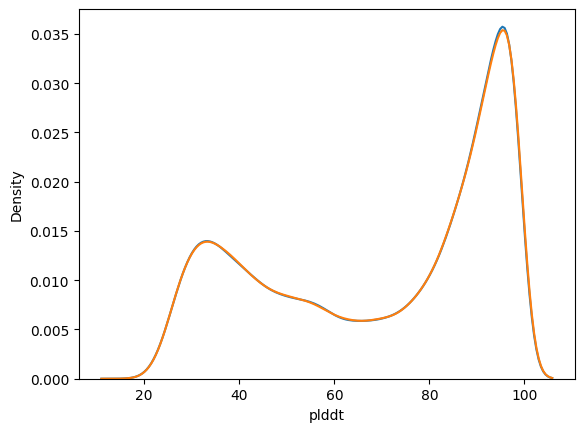

In [207]:
# Plot kde for plddt 
sns.kdeplot(out_df.plddt, label="negative")
sns.kdeplot(pos.plddt, label="positive")

## Sample with larger number of PSP sites 

(regardless of if 3D structure annotation was available)

In [208]:
from phosphosite.dataset.psp import load_psp_alternate
psp = load_psp_alternate(
    include_columns=["uniprot_id", "res", "pos", ]
)
len(psp)

239820

<Axes: xlabel='plddt', ylabel='Density'>

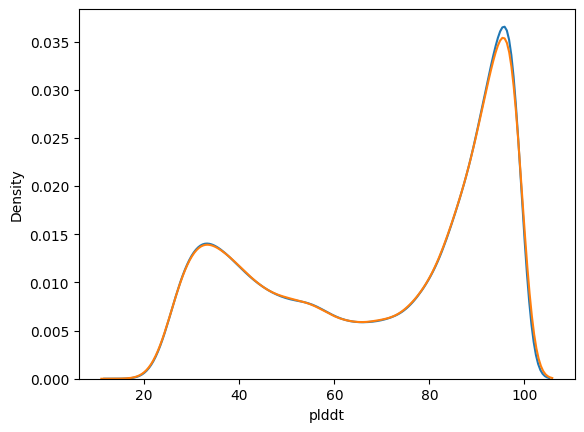

In [209]:

out_df = sample_from_plddt_distribution(
    data=pos,          # positive examples 
    sample_from=neg,  # negative examples
    secondary_structure_col="site_structure",                       # column to use for discrete secondary structure annotation
    plddt_col="plddt",                                          # column to use for pLDDT scores
    n_bins=20,                                                      # number of bins to use for pLDDT scores
    n_samples=len(psp),                                     # use same number as input distribution
)

# Plot kde for plddt 
sns.kdeplot(out_df.plddt, label="negative")
sns.kdeplot(pos.plddt, label="positive")

<Axes: xlabel='residue', ylabel='count'>

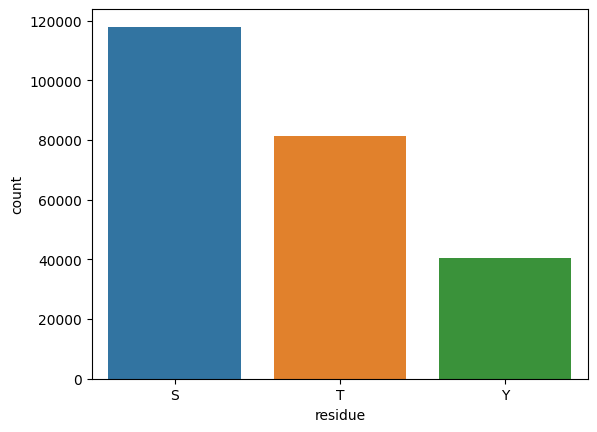

In [212]:
sns.countplot(x="residue", data=out_df, order = ("S", "T", "Y"))

<Axes: xlabel='residue', ylabel='count'>

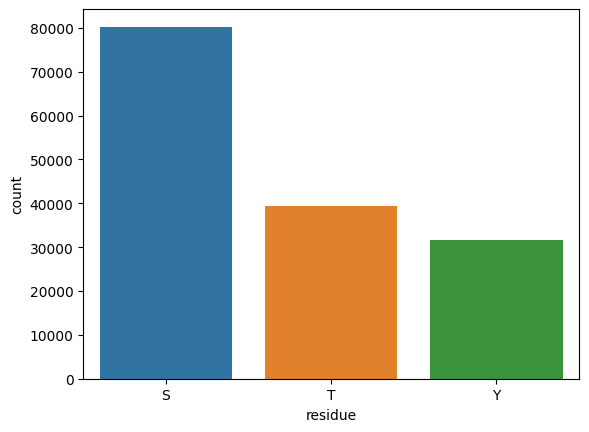

In [213]:
sns.countplot(x="residue", data=pos, order = ("S", "T", "Y"))

In [215]:
pos.residue.value_counts()

S    80267
T    39326
Y    31624
Name: residue, dtype: int64

In [216]:
out_df.residue.value_counts()

S    117919
T     81308
Y     40510
Name: residue, dtype: int64

In [217]:
# Randomly sample the same proportion of each residue type as in the positive set.
# Get the proportion of each residue type in the positive set
pos_counts = pos.residue.value_counts()
pos_counts

S    80267
T    39326
Y    31624
Name: residue, dtype: int64

In [221]:
neg_sites = out_df[[
    "uniprot_id", "position", "residue"
]]

### Save negative examples as index dictionary

In [223]:
# subtract 1 from pos to get index. 
neg_sites["index"] = neg_sites["position"] - 1
# group by uniprot_id to get the list of unsites for each uniprot_id (positions)
neg_sites = neg_sites.groupby("uniprot_id").agg(list)


In [225]:
unsites_uniprot_ids = neg_sites.index.tolist()

with open("unsites_uniprot_ids.txt", "w") as f:
    f.write("\n".join(unsites_uniprot_ids))

In [226]:
# turn dataframe into a dictionary
site_dict = neg_sites.to_dict(orient="index", )
site_dict

{'A0A075B759': {'position': [32, 147, 73, 95, 157, 153],
  'residue': ['T', 'Y', 'T', 'S', 'T', 'S'],
  'index': [31, 146, 72, 94, 156, 152]},
 'A0A087WUL8': {'position': [23,
   95,
   875,
   313,
   520,
   298,
   1122,
   448,
   715,
   309,
   538,
   1203,
   499,
   445,
   306,
   550,
   211,
   344,
   185,
   692,
   689,
   419,
   1385,
   653,
   897,
   814,
   4,
   58,
   634],
  'residue': ['T',
   'Y',
   'S',
   'T',
   'S',
   'S',
   'Y',
   'S',
   'Y',
   'S',
   'S',
   'Y',
   'S',
   'S',
   'S',
   'S',
   'Y',
   'T',
   'S',
   'S',
   'S',
   'S',
   'Y',
   'Y',
   'Y',
   'S',
   'S',
   'Y',
   'Y'],
  'index': [22,
   94,
   874,
   312,
   519,
   297,
   1121,
   447,
   714,
   308,
   537,
   1202,
   498,
   444,
   305,
   549,
   210,
   343,
   184,
   691,
   688,
   418,
   1384,
   652,
   896,
   813,
   3,
   57,
   633]},
 'A0A096LP49': {'position': [812,
   814,
   168,
   829,
   840,
   453,
   492,
   719,
   755,
   1054,
   704,


### Create and save index dict for negative examples

In [227]:
neg_position_dict = dict(zip(neg_sites.index, neg_sites["index"]))
neg_position_dict

{'A0A075B759': [31, 146, 72, 94, 156, 152],
 'A0A087WUL8': [22,
  94,
  874,
  312,
  519,
  297,
  1121,
  447,
  714,
  308,
  537,
  1202,
  498,
  444,
  305,
  549,
  210,
  343,
  184,
  691,
  688,
  418,
  1384,
  652,
  896,
  813,
  3,
  57,
  633],
 'A0A096LP49': [811,
  813,
  167,
  828,
  839,
  452,
  491,
  718,
  754,
  1053,
  703,
  740,
  715,
  357,
  713,
  699,
  180,
  360,
  1008,
  347,
  704,
  129,
  1054,
  707,
  174,
  252,
  1059,
  625,
  308,
  170,
  728,
  727,
  66,
  867,
  789],
 'A0A096LP55': [31],
 'A0A0B4J2A2': [106, 76, 67, 47, 152],
 'A0A0B4J2F2': [648,
  394,
  592,
  593,
  113,
  116,
  337,
  208,
  444,
  292,
  4,
  295,
  441,
  296,
  774,
  715,
  297,
  366,
  298,
  173,
  175,
  188,
  267,
  199,
  410,
  60],
 'A0A0J9YWL9': [151,
  102,
  122,
  890,
  894,
  873,
  877,
  335,
  243,
  869,
  667,
  831,
  953,
  772,
  646,
  352,
  793,
  585,
  354,
  951,
  814,
  583,
  804,
  155,
  564,
  400,
  541,
  411,
  501,
  520,

In [228]:
len(neg_position_dict)

16955

In [229]:
# Save position dict to file
import json
with open("neg_position_dict.json", "w") as f:
    json.dump(neg_position_dict, f)

